<img src="images/ublogo.png"/>

### CSE610 - Bayesian Non-parametric Machine Learning

  - Lecture Notes
  - Instructor - Varun Chandola
  - Term - Fall 2020

### Objective
The objective of this notebook is to provide a quick introduction to the `GPy` library. 

<div class="alert alert-info">

**Note:** This material is based on the GPy tutorials available [here](https://github.com/SheffieldML/notebook).

</div>

In [22]:
import GPy
import numpy as np
#configure plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,5)
import matplotlib;matplotlib.rcParams['text.usetex'] = True
import matplotlib;matplotlib.rcParams['font.size'] = 16
import matplotlib;matplotlib.rcParams['font.family'] = 'serif'
from matplotlib import pyplot as plt
np.random.seed(1)
import warnings
warnings.filterwarnings('ignore')

In [4]:
GPy.plotting.change_plotting_library('plotly_offline')

## 1-dimensional model

For this toy example, we assume we have the following inputs and outputs:

In [32]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05

Note that the observations Y include some noise.

The first step is to define the covariance kernel we want to use for the model. We choose here a kernel based on Gaussian kernel (i.e. rbf or square exponential):

In [7]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

The parameter input_dim stands for the dimension of the input space. The parameters `variance` and `lengthscale` are optional, and default to 1. Many other kernels are implemented, type `GPy.kern.<tab>` to see a list

In [35]:
#type GPy.kern.<tab> here:
GPy.kern.BasisFuncKernel?


The inputs required for building the model are the observations and the kernel:

In [48]:
m = GPy.models.GPRegression(X,Y,kernel)

By default, some observation noise is added to the model. The functions `display` and `plot` give an insight of the model we have just built:

In [49]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,0.9505821421843341,+ve,
rbf.lengthscale,1.7327879526451553,+ve,
Gaussian_noise.variance,1.0,+ve,


In [50]:
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook')

This is the format of your plot grid:
[ (1,1) x1,y1 ]



The above cell shows our GP regression model before optimization of the parameters. The shaded region corresponds to ~95% confidence intervals (ie +/- 2 standard deviation).

The default values of the kernel parameters may not be optimal for the current data (for example, the confidence intervals seems too wide on the previous figure). A common approach is to find the values of the parameters that maximize the likelihood of the data. It as easy as calling `m.optimize` in GPy:

In [51]:
m.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0000   2.247792e+01           nan 
    00s03  0009  -1.013447e+01   9.614033e-02 
    00s08  0018  -1.016410e+01   4.305801e-09 
    00s08  0019  -1.016410e+01   4.305801e-09 
Runtime:     00s08
Optimization status: Converged



If we want to perform some restarts to try to improve the result of the optimization, we can use the `optimize_restarts` function. This selects random (drawn from $N(0,1)$) initializations for the parameter values, optimizes each, and sets the model to the best solution found.

In [15]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = -16.172769815771595
Optimization restart 2/10, f = -16.339545780660018
Optimization restart 3/10, f = -16.17276981577255
Optimization restart 4/10, f = -16.172769815731847
Optimization restart 5/10, f = -16.172769815772487
Optimization restart 6/10, f = -16.17276981577178
Optimization restart 7/10, f = -16.172769815772515
Optimization restart 8/10, f = -16.172769815716716
Optimization restart 9/10, f = -16.17276981577025
Optimization restart 10/10, f = -16.172769815663145


In this simple example, the objective function (usually!) has only one local minima, and each of the found solutions are the same. 

Once again, we can use `print(m)` and `m.plot()` to look at the resulting model resulting model. This time, the paraemters values have been optimized agains the log likelihood (aka the log marginal likelihood): the fit shoul dbe much better. 

In [52]:
display(m)
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook_optimized')

GP_regression.,value,constraints,priors
rbf.variance,0.9505757510084939,+ve,
rbf.lengthscale,1.7327776161828639,+ve,
Gaussian_noise.variance,0.004640183435914298,+ve,


This is the format of your plot grid:
[ (1,1) x1,y1 ]



### New plotting of GPy 0.9 and later
The new plotting allows you to plot the density of a GP object more fine grained by plotting more percentiles of the distribution color coded by their opacity

In [53]:
display(m)
fig = m.plot(plot_density=True)
GPy.plotting.show(fig, filename='basic_gp_regression_density_notebook_optimized')

GP_regression.,value,constraints,priors
rbf.variance,0.9505757510084939,+ve,
rbf.lengthscale,1.7327776161828639,+ve,
Gaussian_noise.variance,0.004640183435914298,+ve,


This is the format of your plot grid:
[ (1,1) x1,y1 ]



## 2-dimensional example

Here is a 2 dimensional example:

In [55]:
# sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2])+np.random.randn(50,1)*0.05

# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)
fig = m.plot()
display(GPy.plotting.show(fig, filename='basic_gp_regression_notebook_2d'))
display(m)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s02  0003   1.801061e+01   1.086986e+02 
    00s06  0012  -1.860569e+01   4.535250e+00 
    00s08  0017  -1.947906e+01   1.871671e-04 
    00s10  0021  -1.947908e+01   4.841819e-10 
Runtime:     00s10
Optimization status: Converged

This is the format of your plot grid:
[ (1,1) x1,y1 ]



None

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.4185981440553055,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,0.0007470765757930887,+ve,
Gaussian_noise.variance,0.0007470765757930887,+ve,


The flag `ARD=True` in the definition of the `Matern` kernel specifies that we want one lengthscale parameter per dimension (ie the GP is not isotropic). Note that for 2-d plotting, only the mean is shown. 

## Plotting slices
To see the uncertaintly associated with the above predictions, we can plot slices through the surface. this is done by passing the optional `fixed_inputs` argument to the plot function. `fixed_inputs` is a list of tuples containing which of the inputs to fix, and to which value.

To get horixontal slices of the above GP, we'll fix second (index 1) input to -1, 0, and 1.5:

In [19]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1, 
                        shared_xaxes=True,
                        subplot_titles=('slice at -1', 
                                        'slice at 0', 
                                        'slice at 1.5', 
                                        )
                            )
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1,y)], row=(i+1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]



A few things to note:
 * we've also passed the optional `ax` argument, to mnake the GP plot on a particular subplot
 * the data look strange here: we're seeing slices of the GP, but all the data are displayed, even though they might not be close to the current slice.

To get vertical slices, we simply fixed the other input. We'll turn the display of data off also:

In [20]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1, 
                        shared_xaxes=True,
                        subplot_titles=('slice at -1', 
                                        'slice at 0', 
                                        'slice at 1.5', 
                                        )
                            )
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0,y)], row=(i+1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing_vertical')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]



You can find a host of other plotting options in the `m.plot` docstring. `Type m.plot?<enter>` to see. 

### Gaussian process classification
Gaussian Process classification is perhaps the most popular case of a GP model where the likelihood is not conjugate to the prior. In the classification case, the likelihood is Bernoulli, and we must perform approximate inference over the values of the function. There are many approaches to making such an approximation: here we'll start with the popular EP method. 

#### The generative model
To illustate GP classification, we'll first consider the generative model of the data. In classification, we consider the labels (0 or 1) to be generated by a conditional distribution given the inputs, $\mathbf X$. 

In GP classification, the model is that there is a hidden function, drawn from a GP, which takes continuous values. Those values are then squashed through a probit function,  into the range $[0, 1]$, and can then be used as probabilities. Bernoulli draws are then made (taking the values 0 or 1) conditioned on the squashed values.

First we'll set up a kernel for the GP from which to draw some latent function values (a candidate hidden function for the above generative model), given some arbitrary positions $\mathbf X$ at which we get observations.



Text(0, 0.5, '$f(x)$')

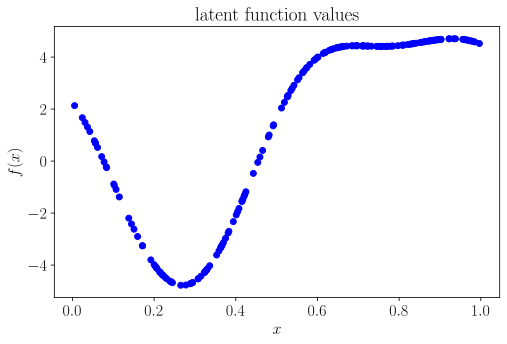

In [56]:
k = GPy.kern.RBF(1, variance=7., lengthscale=0.2)
X = np.random.rand(200,1)

#draw the latent function value
f = np.random.multivariate_normal(np.zeros(200), k.K(X))

plt.plot(X, f, 'bo')
plt.title('latent function values');plt.xlabel('$x$');plt.ylabel('$f(x)$')

Text(0, 0.5, '$\\sigma(f(x))$')

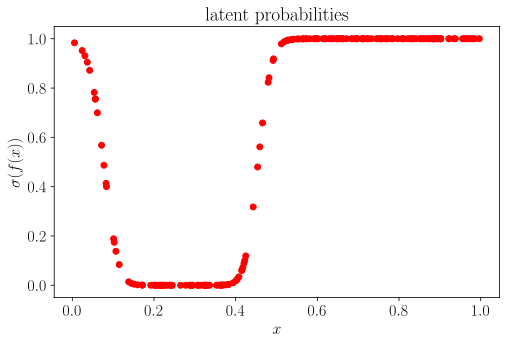

In [57]:
lik = GPy.likelihoods.Bernoulli()
p = lik.gp_link.transf(f) # squash the latent function
plt.plot(X, p, 'ro')
plt.title('latent probabilities');plt.xlabel('$x$');plt.ylabel('$\sigma(f(x))$')


Text(0, 0.5, '$y \\in \\{0,1\\}$')

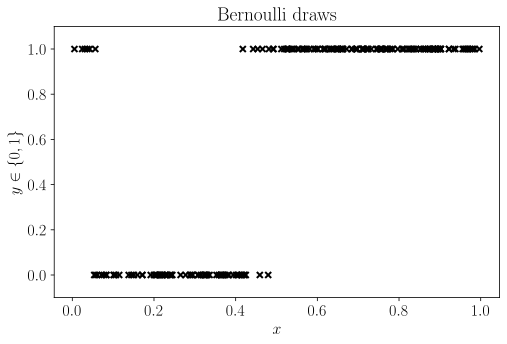

In [59]:
Y = lik.samples(f).reshape(-1,1)
plt.plot(X, Y,'kx', mew=2);plt.ylim(-0.1, 1.1)
plt.title('Bernoulli draws');plt.xlabel('$x$');plt.ylabel('$y \in \{0,1\}$')


#### Inference
We have now generated some data from our proposed model. We'll now attempt to recover the latent function.

In this case we wish to know, given the observed binary variables, can we recover the latent function, the associated probabilities, and the variance and lengthscale of the GP that we believe produced the data?

We'll set up a `GPy` classifier to do this. first we'll use the most general setup for defining a GP object in `GPy`, allowing us to select the EP inference method and use our existing likelihood and kernel.

In [26]:
m = GPy.core.GP(X=X,
                Y=Y, 
                kernel=k, 
                inference_method=GPy.inference.latent_function_inference.laplace.Laplace(),
                likelihood=lik)
print(m)


Name : gp
Objective : 101.52602911311783
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |  value  |  constraints  |  priors
  rbf.variance     |    7.0  |      +ve      |        
  rbf.lengthscale  |    0.2  |      +ve      |        


There's a simpler way to build GP classifiers, with some default options (RBF kernel, EP inference) like so:

In [60]:
m = GPy.models.GPClassification(X,Y)

This is the format of your plot grid:
[ (1,1) x1,y1 ]

This is the format of your plot grid:
[ (1,1) x1,y1 ]



Text(0.5, 0, '$x$')

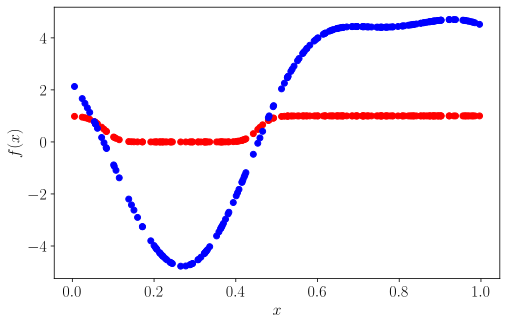

In [61]:
m.plot()
plt.plot(X, p, 'ro')
plt.ylabel('$y, p(y=1)$');plt.xlabel('$x$')

m.plot_f()
plt.plot(X, f, 'bo')
plt.ylabel('$f(x)$');plt.xlabel('$x$')

In the above plots, we can see the posterior over the latent probabilities (top) and latent continuous function values (bottom). We've already run EP to obtain the approximate posterior and marginal likelihood. The above plots suggest that the lengthscale of the kernel is incorrect for this problem, so we'll optimize the parameters of the kernel against the approximate marginal likelihood, $p(y|\mathcal{M})$, that represents how probable the data is given our model, $\mathcal{M}$. 

To do this, we interleave runs of EP with optimization of the parameters using gradient descent methods. EP is a method for fitting a Gaussian to the posterior, $p(f|y)$, of the latent (hidden) function, given the data. Whilst the parameters are being optimized, the EP approximation (the parameters of the EP factors) is fixed.  

In [62]:
print (m, '\n')
for i in range(5):
    m.optimize('bfgs', max_iters=100) #first runs EP and then optimizes the kernel parameters
    print ('iteration:', i,)
    print (m)
    print ()
        


Name : gp_classification
Objective : 71.49284637859692
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp_classification.  |  value  |  constraints  |  priors
  rbf.variance        |    1.0  |      +ve      |        
  rbf.lengthscale     |    1.0  |      +ve      |         

iteration: 0

Name : gp_classification
Objective : 38.901060725850925
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp_classification.  |               value  |  constraints  |  priors
  rbf.variance        |  3.7256680011426675  |      +ve      |        
  rbf.lengthscale     |  0.2348991752713262  |      +ve      |        

iteration: 1

Name : gp_classification
Objective : 23.975471063840303
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp_classification.  |               value  |  constraints  |  priors
  rbf.variance        |  15.360531777715087  |      +ve      |        
  

Now our parameters have been optimised to the values that give the largest marginal likelihood, we can plot the results to see how they differ

This is the format of your plot grid:
[ (1,1) x1,y1 ]

This is the format of your plot grid:
[ (1,1) x1,y1 ]



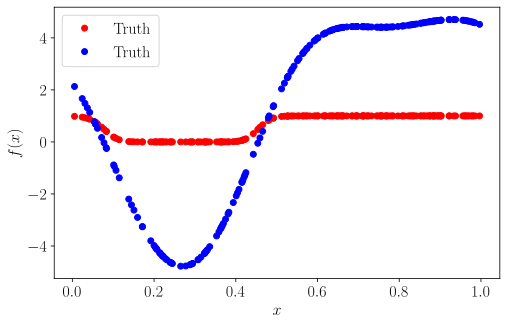

In [63]:
m.plot()
plt.plot(X, p, 'ro', label='Truth')
plt.ylabel('$y, p(y=1)$');plt.xlabel('$x$')
plt.legend()
m.plot_f()
plt.plot(X, f, 'bo', label='Truth')
plt.ylabel('$f(x)$');plt.xlabel('$x$')
plt.legend()

The above plots are much more satisfactory: we have managed to infer the correct form of the latent function. 

We've seen the generating process for GP classification, and how to set up models in GPy to do classification. We've used EP to infer the latent function, interleaved with optimization of the kernel parameters. There are other latent-function inference methods in GPy, such as the Laplace approximation and the forthcoming variational approximation. 

### Plotting the density more fine-grained

The newest version of GPy allows for densities to be plotted more directly. The outcome of this may surprise you, but it is actually what the density looks like for a Bernoulli likelihood.

This is the format of your plot grid:
[ (1,1) x1,y1 ]

This is the format of your plot grid:
[ (1,1) x1,y1 ]



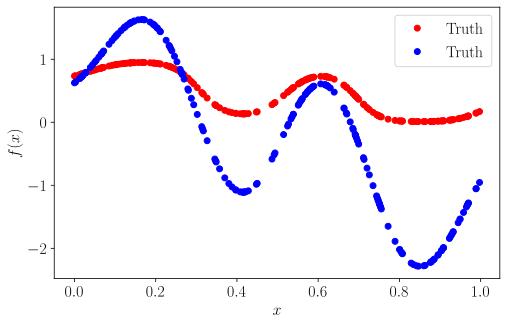

In [31]:
m.plot(plot_density=True)
plt.plot(X, p, 'ro', label='Truth')
plt.ylabel('$y, p(y=1)$');plt.xlabel('$x$')
plt.legend()
m.plot_f(plot_density=True)
plt.plot(X, f, 'bo', label='Truth')
plt.ylabel('$f(x)$');plt.xlabel('$x$')
plt.legend()